<a href="https://colab.research.google.com/github/Tharunkumar1724/Diabates_Prediction/blob/main/Diabates_prediction_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
path="/content/gdrive/MyDrive/ Dataset/diabetes_prediction_dataset.csv"
df1=pd.read_csv(path)
df1

Mounted at /content/gdrive


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
df1['age']=pd.to_numeric(df1['age'],errors='coerce').astype(int)
df1['age'].dtype

dtype('int64')

In [5]:
df1['age'].head()

,age
0,80
1,54
2,28
3,36
4,76


In [6]:
df1['diabetes'].unique()

array([0, 1])

In [7]:
if(df1.isnull().any().any()):
  print("true")
else:
  print("false")

false


In [8]:
print(df1.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
df1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [11]:
encoder=OneHotEncoder(sparse_output=False)
df1['gender']=encoder.fit_transform(df1['gender'].values.reshape(-1,1))
df1['smoking_history']=encoder.fit_transform(df1['smoking_history'].values.reshape(-1,1))
X = df1.drop('diabetes', axis=1)  # Remove the trailing space from 'diabetes '
Y = df1['diabetes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(100000, 8) (80000, 8) (20000, 8)


In [12]:
clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]})

[[18252     0]
 [  597  1151]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18252
           1       1.00      0.66      0.79      1748

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



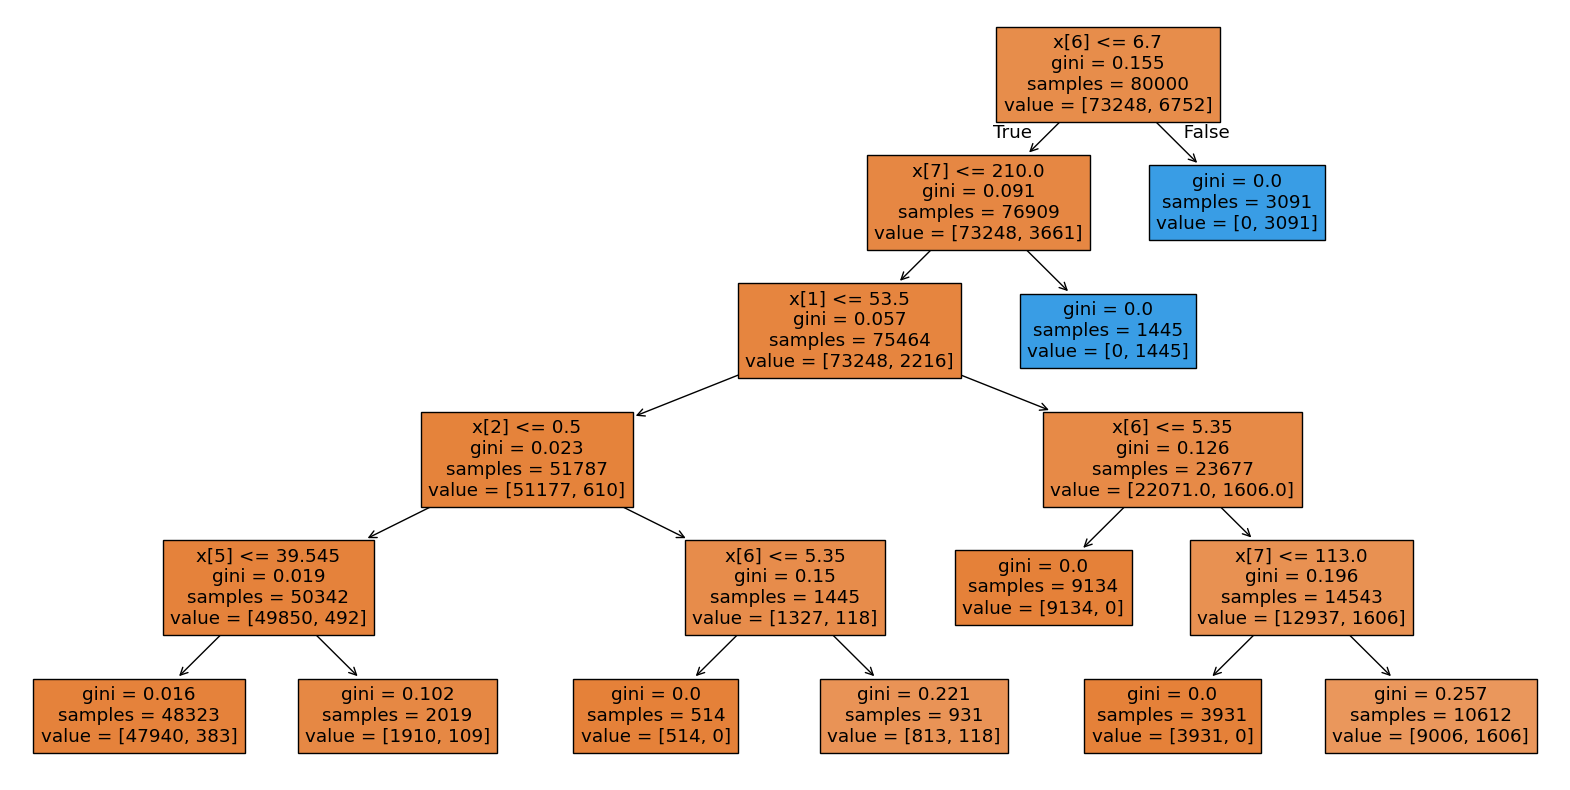

In [17]:
best_clf = grid_search.best_estimator_

# Make predictions
Y_pred = best_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True)
plt.show()
